In [118]:
import cv2 as cv
import numpy as np
import pandas as pd
#import xlsxwriter
import matplotlib.pyplot as plt
%matplotlib inline
#import pickle
from PIL import Image
import PIL
import pytesseract
import csv
import glob
import os
import math as m
import sklearn

In [119]:
import re #for Regular expression operations
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

def shapesize(width,height): 
        k = ((height*height)+(width*width)) #using pythagorean theorem
        print (k)
        k = m.sqrt(k)
        return k

Cars1.png
car:0.97
0.9662531018257141
830160
x1: 50
y1: 5
x2: 746
y2: 593
car:0.94
0.9365389943122864
186082
Cars7.png
car:0.99
0.9898461103439331
286436
x1: 170
y1: 21
x2: 580
y2: 365
Cars9.png
car:0.90
0.9005919694900513
720805
x1: 65
y1: 82
x2: 743
y2: 593
Cars11.png
car:0.68
0.6755520701408386
772565
x1: 47
y1: 9
x2: 760
y2: 523
Cars13.png
car:0.99
0.9945071935653687
617066
x1: 71
y1: 111
x2: 750
y2: 506
car:0.84
0.8413529396057129
36749
Cars24.png
car:0.95
0.9465079307556152
517025
x1: 103
y1: 93
x2: 683
y2: 518
Cars25.png
car:0.90
0.8961459994316101
335812
x1: 170
y1: 123
x2: 604
y2: 507
Cars34.png
car:0.98
0.9801050424575806
681652
x1: 67
y1: 30
x2: 743
y2: 504
car:0.96
0.9569462537765503
33842
Cars36.png
car:0.87
0.867563784122467
749237
x1: 34
y1: 44
x2: 780
y2: 483
car:0.85
0.8474117517471313
104660
car:0.77
0.7694947719573975
124945
Cars53.png
car:0.80
0.8013792634010315
728701
x1: 50
y1: 67
x2: 749
y2: 557
Cars68.png
car:0.99
0.9945071935653687
617066
x1: 71
y1: 111
x2: 750

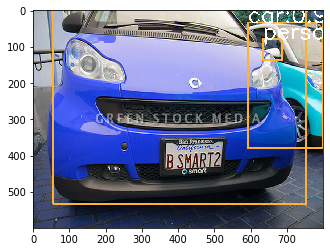

In [120]:
check_var = 0
for filename in sorted(glob.glob('C:/Users/imran/Desktop/RGU/Course- Data Science/Final Project/YOLO/cars/train/*.png'), key=numericalSort): #assuming png
    #Write down conf, nms thresholds,inp width/height
    confThreshold = 0.25
    nmsThreshold = 0.40
    inpWidth = 416
    inpHeight = 416

    #Load names of classes and turn that into a list
    classesFile = "coco.names.txt"
    classes = None

    with open(classesFile,'rt') as f:
        classes = f.read().rstrip('\n').split('\n')

    #Model configuration
    modelConf = 'yolov3.cfg'
    modelWeights = 'yolov3.weights'

    def postprocess(frame, outs):
        frameHeight = frame.shape[0]
        frameWidth = frame.shape[1]

        classIDs = []
        confidences = []
        boxes = []

        for out in outs:
            for detection in out:

                scores = detection [5:]
                classID = np.argmax(scores)
                confidence = scores[classID]

                if confidence > confThreshold:
                    centerX = int(detection[0] * frameWidth)
                    centerY = int(detection[1] * frameHeight)

                    width = int(detection[2]* frameWidth)
                    height = int(detection[3]*frameHeight )

                    left = int(centerX - width/2)
                    top = int(centerY - height/2)

                    classIDs.append(classID)
                    confidences.append(float(confidence))
                    boxes.append([left, top, width, height])

        indices = cv.dnn.NMSBoxes (boxes,confidences, confThreshold, nmsThreshold )

        indices = cv.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)

        for i in indices:
            i = i[0]
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]
            drawPred(classIDs[i], confidences[i], left, top, left + width, top + height, file, width, height)
    
    def shapesize(width,height):
        k = ((height*height)+(width*width))
        print (k)
        k = m.sqrt(k)
        return k

    def drawPred(classId, conf, left, top, right, bottom, file, width, height):
        # Draw a bounding box.
        cv.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
        global check_var
        label = '%.2f' % conf
        
        # Get the label for the class name and its confidence
        if classes:
            assert (classId < len(classes))
            label = '%s:%s' % (classes[classId], label)
            accuracy = conf
            carlabel= (classes[classId])
            #print(carlabel)
            if carlabel == "car":
                print (label)
                print (accuracy)
            if carlabel == "car" and accuracy > 0.6:
                diag_size = shapesize(width,height)
                if diag_size > 300 and left < 500 and bottom > 200 and right < 795 and right > 200 :
                #print("-----car coordinates-----")
                #print("accuracy:", conf)
                    print("x1:", left)
                    print("y1:", top)
                    print("x2:", right)
                    print("y2:", bottom)
                #print("-----car coordinates finishes here-----")
                #df = pd.DataFrame({'x_min':[left],'x_max':[top],'y_min':[bottom],'y_max':[right]})
                    """
                    if left < 0:
                        left = 0
                    if top < 0:
                        top = 0
                    if right > 800:
                        right = 800
                    """ 
                    List=[left,top,right,bottom,file]
                    

                    if check_var == 0:
                        with open('car_coord.csv', 'a') as coord_object:
                            writer_object = csv.writer(coord_object, lineterminator='\n',)
                            writer_object.writerow(["x1","y1","x2","y2","filename"])
                            writer_object.writerow(List)
                            coord_object.close()
                            check_var = 1
                    else:
                        with open('car_coord.csv', 'a') as coord_object:
                                writer_object = csv.writer(coord_object, lineterminator='\n')
                                writer_object.writerow(List)
                                coord_object.close()


        #A fancier display of the label from learnopencv.com 
        # Display the label at the top of the bounding box
        #labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        #top = max(top, labelSize[1])
        #cv.rectangle(frame, (left, top - round(1.5 * labelSize[1])), (left + round(1.5 * labelSize[0]), top + baseLine),
                     #(255, 255, 255), cv.FILLED)
        # cv.rectangle(frame, (left,top),(right,bottom), (255,255,255), 1 )
        #cv.putText(frame, label, (left, top), cv.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0), 1)
        cv.putText(frame, label, (left,top), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

    def getOutputsNames(net):
        # Get the names of all the layers in the network
        layersNames = net.getLayerNames()

        # Get the names of the output layers, i.e. the layers with unconnected outputs
        return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]


    #Set up the net


    net = cv.dnn.readNetFromDarknet(modelConf, modelWeights)
    net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
    net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)


    #Process inputs
    #winName = 'DL OD with OpenCV'
    #cv.namedWindow(winName, cv.WINDOW_NORMAL)
    #cv.resizeWindow(winName, 800,450)





    #cap = cv.VideoCapture(0)
    #cap = cv.imread('car2.jpg')
    #cap = cv.imread('Car.jpg')
    #cap = Image.open(filename)
    cap = cv.imread(filename)
    file = os.path.basename(filename)
    print(file)
    #while cv.waitKey(1) < 0:

    #get frame from video
    #hasFrame, frame = cap.read()
    frame = cap
    #Create a 4D blob from a frame

    blob = cv.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop = False)

    #Set the input the the net
    net.setInput(blob)
    outs = net.forward (getOutputsNames(net))
    
    postprocess (frame, outs)
    #show the image
    #cv.imshow(winName, frame)
   
    plt.imshow(cap)
    

In [121]:
#Normalizing data
directory = "C:/Users/imran/Desktop/RGU/Course- Data Science/Final Project/YOLO/car_coord.csv"
df = pd.read_csv (directory)
display(df.head())
#def NormalizeData(data):
 #   return (data - np.min(data)) / (np.max(data) - np.min(data))
#n_coord = NormalizeData(df)
headers =["x1","y1","x2","y2"]
#normalizing against image dimensions:
de = [df["x1"]/800,df["y1"]/600,df["x2"]/800,df["y2"]/600]
n_coord = pd.concat(de, axis=1, keys=headers)
display(n_coord)
n_coord.shape

,x1,y1,x2,y2,filename
0,50,5,746,593,Cars1.png
1,170,21,580,365,Cars7.png
2,65,82,743,593,Cars9.png
3,47,9,760,523,Cars11.png
4,71,111,750,506,Cars13.png


,x1,y1,x2,y2
0,0.06250,0.008333,0.93250,0.988333
1,0.21250,0.035000,0.72500,0.608333
2,0.08125,0.136667,0.92875,0.988333
3,0.05875,0.015000,0.95000,0.871667
4,0.08875,0.185000,0.93750,0.843333
5,0.12875,0.155000,0.85375,0.863333
6,0.21250,0.205000,0.75500,0.845000
7,0.08375,0.050000,0.92875,0.840000
8,0.04250,0.073333,0.97500,0.805000
9,0.06250,0.111667,0.93625,0.928333


(40, 4)

In [122]:
directory = "C:/Users/imran/Desktop/RGU/Course- Data Science/Final Project/YOLO/train_annotations.csv"
df2 = pd.read_csv (directory)
display(df2.head())
headers =["a1","b1","a2","b2"]
de2 = [(df2["a1"]-df["x1"])/(df["x2"]-df["x1"]), (df2["b1"]-df["y1"])/(df["y2"]-df["y1"]), (df2["a2"]-df["x1"])/(df["x2"]-df["x1"]), (df2["b2"]-df["y1"])/(df["y2"]-df["y1"])]
#de2 = [(df2["a1"]-df["x1"])/(df["x2"]-df["x1"]), (df2["b1"]-df["y1"])/(df["y2"]-df["y1"])]                                                                                                                 
t_annotations = pd.concat(de2, axis=1, keys=headers)
display(t_annotations)

,a1,b1,a2,b2,filename
0,255,290,529,396,Cars1.png
1,323,279,427,347,Cars7.png
2,288,389,508,452,Cars9.png
3,228,391,574,471,Cars11.png
4,361,309,499,389,Cars13.png


,a1,b1,a2,b2
0,0.294540,0.484694,0.688218,0.664966
1,0.373171,0.750000,0.626829,0.947674
2,0.328909,0.600783,0.653392,0.724070
3,0.253857,0.743191,0.739130,0.898833
4,0.427099,0.501266,0.630339,0.703797
5,0.370690,0.677647,0.662069,0.849412
6,0.400922,0.606771,0.633641,0.817708
7,0.307692,0.580169,0.692308,0.772152
8,0.353887,0.562642,0.607239,0.788155
9,0.333333,0.636735,0.683834,0.808163


In [123]:
t_annotations.shape

(40, 4)

In [6]:
#de= [df.iloc[:,'x1']/800, df.iloc[:,'y1']/600]

#Ndf = pd.concat(de, axis=1, keys=headers)
#for i in df:
 #   de['A']=(df.at[i,'x1']/800)
#de.head()


In [124]:
X = n_coord[['x1', 'y1', 'x2','y2']] #independent values
y = t_annotations['a1'] #dependents
y1 = t_annotations['b1']
y2 = t_annotations['a2']
y3 = t_annotations['b2']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=0)

In [126]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

regressor3 = LinearRegression()
regressor3.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print("a1")
display(coeff_df)

coeff_df = pd.DataFrame(regressor1.coef_, X.columns, columns=['Coefficient'])
print("b1")
display(coeff_df)

coeff_df = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])
print("a2")
display(coeff_df)

coeff_df = pd.DataFrame(regressor3.coef_, X.columns, columns=['Coefficient'])
print("b2")
display(coeff_df)


a1


,Coefficient
x1,-0.996733
y1,-0.007023
x2,-0.800836
y2,-0.097425


b1


,Coefficient
x1,0.265466
y1,-0.374720
x2,0.000260
y2,-0.061141


a2


,Coefficient
x1,0.117208
y1,-0.105112
x2,-0.074661
y2,0.138822


b2


,Coefficient
x1,-0.988540
y1,-0.151060
x2,-0.710536
y2,-0.361259


In [129]:
y_pred = regressor.predict(X_test)
y_pred1 = regressor1.predict(X_test1)
y_pred2 = regressor2.predict(X_test2)
y_pred3 = regressor3.predict(X_test3)

In [130]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Point a1:")
display(df)

df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
print("Point b1:")
display(df1)

df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
print("Point a2:")
display(df2)

df3 = pd.DataFrame({'Actual': y_test3, 'Predicted': y_pred3})
print("Point b2:")
display(df3)

Point a1:


,Actual,Predicted
22,0.413502,0.338151
20,0.318841,0.327658
25,0.400844,0.338151
4,0.427099,0.320820
10,0.438881,0.320820
15,0.286533,0.335373
28,0.324111,0.327658
11,0.315089,0.334083


Point b1:


,Actual,Predicted
22,0.786543,0.593507
20,0.630561,0.586169
25,0.793503,0.593507
4,0.501266,0.560949
10,0.506329,0.560949
15,0.311155,0.563952
28,0.646035,0.586169
11,0.590717,0.610410


Point a2:


,Actual,Predicted
22,0.600563,0.647899
20,0.661397,0.661473
25,0.606188,0.647899
4,0.630339,0.646934
10,0.631811,0.646934
15,0.693410,0.669198
28,0.654809,0.661473
11,0.690828,0.660729


Point b2:


,Actual,Predicted
22,0.946636,0.803744
20,0.773694,0.766302
25,0.951276,0.803744
4,0.703797,0.760986
10,0.706329,0.760986
15,0.553816,0.744484
28,0.773694,0.766302
11,0.761603,0.793743


In [131]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error1:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print('Root Mean Squared Error2:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('Root Mean Squared Error3:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

Mean Absolute Error: 0.05532313389255654
Mean Squared Error: 0.004709804404621952
Root Mean Squared Error: 0.06862801472155487
Root Mean Squared Error1: 0.1385891177022319
Root Mean Squared Error2: 0.02743446494690668
Root Mean Squared Error3: 0.10364493768448138


548488
car:0.98
-----car coordinates-----
accuracy: 0.9793319702148438
x1: 115
y1: 104
x2: 697
y2: 562
548488
740.5997569537814
-----car coordinates finishes here-----


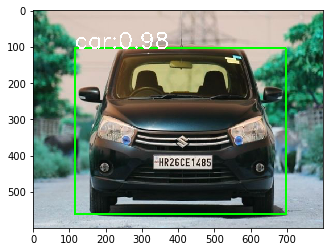

In [165]:
 
#Write down conf, nms thresholds,inp width/height
confThreshold = 0.25
nmsThreshold = 0.40
inpWidth = 416
inpHeight = 416

#Load names of classes and turn that into a list
classesFile = "coco.names.txt"
classes = None

with open(classesFile,'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

#Model configuration
modelConf = 'yolov3.cfg'
modelWeights = 'yolov3.weights'

top_left = 0
top_right = 0
bottom_left = 0
bottom_right = 0

def savingcoordinates(topleft, topright, bottomleft, bottomright, accuracy):
    top_left = topleft
    pickle.dump(top_left, open("save.p", "wb"))
    top_right = topright
    pickle.dump(top_right, open("save1.p", "wb"))
    bottom_left = bottomleft
    pickle.dump(bottom_left, open("save2.p", "wb"))
    bottom_right = bottomright
    pickle.dump(bottom_right, open("save3.p", "wb"))
    pickle.dump(accuracy, open("save4.p", "wb"))
    

def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    classIDs = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            
            scores = detection [5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > confThreshold:
                centerX = int(detection[0] * frameWidth)
                centerY = int(detection[1] * frameHeight)

                width = int(detection[2]* frameWidth)
                height = int(detection[3]*frameHeight )

                left = int(centerX - width/2)
                top = int(centerY - height/2)

                classIDs.append(classID)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    indices = cv.dnn.NMSBoxes (boxes,confidences, confThreshold, nmsThreshold )

    indices = cv.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(classIDs[i], confidences[i], left, top, left + width, top + height, width, height)


def drawPred(classId, conf, left, top, right, bottom, width, height):
    
    label = '%.2f' % conf

    # Get the label for the class name and its confidence
    if classes:
        assert (classId < len(classes))
        label = '%s:%s' % (classes[classId], label)
        carlabel= (classes[classId])
        accuracy= conf
        #if carlabel == "car" and accuracy > 0.6:
        if carlabel == "car" and accuracy > 0.6:
            diag_size = shapesize(width,height)
            if diag_size > 300 and left < 500 and bottom > 200 and right < 795 and right > 200 :

                #if left > 2 and left < 700:

                cv.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 3)
                #if left > 2 and left < 500 and bottom > 200 and right < 795 and right > 200 :

                #print(accuracy)
                print (label)
                print("-----car coordinates-----")
                print("accuracy:", conf)
                print("x1:", left)
                print("y1:", top)
                print("x2:", right)
                print("y2:", bottom)
                crop = frame[top:bottom, left:right]
                cv.imwrite('C:/Users/imran/Desktop/RGU/Course- Data Science/Final Project/YOLO/cropcar.png', crop)

                k = ((height*height)+(width*width))
                print (k)
                k = m.sqrt(k)
                print (k)
                List1=[left,top,right,bottom]
                with open('new_car.csv', 'w') as coord_object:
                            writer_object = csv.writer(coord_object, lineterminator='\n')
                            writer_object.writerow(["x1","y1","x2","y2"])
                            writer_object.writerow(List1)
                            coord_object.close()
                            check_var = 1
                print("-----car coordinates finishes here-----")
                cv.putText(frame, label, (left,top), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
   
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]


#Set up the net
net = cv.dnn.readNetFromDarknet(modelConf, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

cap = cv.imread('Cars372.png')

frame = cap
#Create a 4D blob from a frame

blob = cv.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop = False)

#Set the input the the net
net.setInput(blob)
outs = net.forward (getOutputsNames(net))
postprocess (frame, outs)
plt.imshow(cap)

,x1,y1,x2,y2
0,115,104,697,562


,x1,y1,x2,y2
0,0.14375,0.173333,0.87125,0.936667


a1: 0    295.44537
dtype: float64
b1: 0    366.982437
dtype: float64
a2: 0    506.400993
dtype: float64
b2: 0    434.554147
dtype: float64


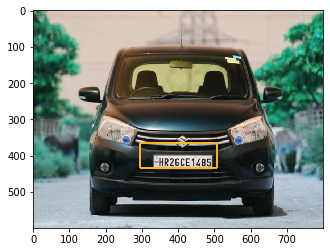

In [166]:
directory = "C:/Users/imran/Desktop/RGU/Course- Data Science/Final Project/YOLO/new_car.csv"
cf = pd.read_csv (directory)
x1= cf["x1"]
y1= cf["y1"]
x2= cf["x2"]
y2= cf["y2"]

display(cf.head())
headers =["x1","y1","x2","y2"]

#normalizing against image dimensions:
ce = [cf["x1"]/800,cf["y1"]/600,cf["x2"]/800,cf["y2"]/600]
single_coord = pd.concat(ce, axis=1, keys=headers)
display(single_coord)

a1_pred = regressor.predict(single_coord)
b1_pred = regressor1.predict(single_coord)
a2_pred = regressor2.predict(single_coord)
b2_pred = regressor3.predict(single_coord)

#y_pred1s = model.predict(single_coord)
#y_pred2s = model2.predict(single_coord)
#y_pred3s = model3.predict(single_coord)
#y_pred4s = model4.predict(single_coord)
#print(y_pred1s)
#print (y_pred2s)
#print (y_pred3s)
#print (y_pred4s)
#display(type(y_pred1s))

"""
y_pred = y_pred1s[0]
print (y_pred)
y_pred1 = y_pred2s[0]
y_pred2 = y_pred3s[0]
y_pred3 = y_pred4s[0]
"""
#q1 = q1 * (250-50) + 50
a1 = a1_pred * (x2-x1) + x1
b1 = b1_pred * (y2-y1) + y1
a2 = a2_pred * (x2-x1) + x1
b2 = b2_pred * (y2-y1) + y1
print ("a1:",a1)
print ("b1:",b1)
print ("a2:",a2)
print ("b2:",b2)
cap = cv.imread('Cars372.png')
cv.rectangle(cap, (a1, b1), (a2, b2), (255, 178, 50), 3)
plt.imshow(cap)

-------Optical Character Recognition-------
OUTPUT: HR26CE1485



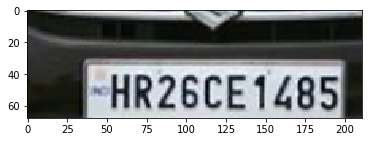

In [144]:
directory = "C:/Users/imran/Desktop/RGU/Course- Data Science/Final Project/YOLO/new_car.csv"
cf = pd.read_csv (directory)
x1s= cf["x1"]
y1s= cf["y1"]
x2s= cf["x2"]
y2s= cf["y2"]

im = Image.open("Cars372.png")
img2 = im.crop((a1,b1,a2,b2))
img2 = np.array(img2)
plt.imshow(img2)

"""
img = np.array(img2)
#convert my image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#perform adaptive threshold so that I can extract proper contours from the image
#need this to extract the name plate from the image. 
thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
contours,h = cv.findContours(thresh,1,2)[-2:]

#once I have the contours list, i need to find the contours which form rectangles.
#the contours can be approximated to minimum polygons, polygons of size 4 are probably rectangles
largest_rectangle = [0,0]
for cnt in contours:
    approx = cv.approxPolyDP(cnt,0.01*cv.arcLength(cnt,True),True)
    if len(approx)==4: #polygons with 4 points is what I need.
        area = cv.contourArea(cnt)
        if area > largest_rectangle[0]:
            #find the polygon which has the largest size.
            largest_rectangle = [cv.contourArea(cnt), cnt, approx]

x,y,w,h = cv.boundingRect(largest_rectangle[1])
#crop the rectangle to get the number plate.
roi=img[y:y+h,x:x+w]
#cv2.drawContours(img,[largest_rectangle[1]],0,(0,0,255),-1)
plt.imshow(roi)
roi2 = Image.fromarray(roi)
new = roi2.save("crop_plate2.png")
"""
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
kernel = np.ones((2, 1), np.uint8)
img1 = cv.erode(img2, kernel, iterations=1)
img = cv.dilate(img1, kernel, iterations=1)
out_below = pytesseract.image_to_string(img ,lang='eng', config='--psm 4 --oem 1 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVXYZ0123456789')

print("-------Optical Character Recognition-------")
print("OUTPUT:", out_below)

In [319]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()
model2 = Sequential()
model3 = Sequential()
model4 = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 4))
model2.add(Dense(32, activation = 'relu', input_dim = 4))
model3.add(Dense(32, activation = 'relu', input_dim = 4))
model4.add(Dense(32, activation = 'relu', input_dim = 4))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 32, activation = 'relu'))
model3.add(Dense(units = 32, activation = 'relu'))
model4.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 32, activation = 'relu'))
model3.add(Dense(units = 32, activation = 'relu'))
model4.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))
model2.add(Dense(units = 1))
model3.add(Dense(units = 1))
model4.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
model2.fit(X_train1, y_train1, batch_size = 10, epochs = 100)
model3.fit(X_train2, y_train2, batch_size = 10, epochs = 100)
model4.fit(X_train3, y_train3, batch_size = 10, epochs = 100)



Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1966
Epoch 2/100
36/36 [==============================] - 0s 222us/step - loss: 0.1460
Epoch 3/100
36/36 [==============================] - 0s 194us/step - loss: 0.1068
Epoch 4/100
36/36 [==============================] - 0s 222us/step - loss: 0.0756
Epoch 5/100
36/36 [==============================] - 0s 333us/step - loss: 0.0516
Epoch 6/100
36/36 [==============================] - 0s 222us/step - loss: 0.0328
Epoch 7/100
36/36 [==============================] - 0s 250us/step - loss: 0.0194
Epoch 8/100
36/36 [==============================] - 0s 194us/step - loss: 0.0099
Epoch 9/100
36/36 [==============================] - 0s 194us/step - loss: 0.0045
Epoch 10/100
36/36 [==============================] - 0s 250us/step - loss: 0.0025
Epoch 11/100
36/36 [==============================] - 0s 278us/step - loss: 0.0023
Epoch 12/100
36/36 [==============================] - 0s 222us/step - loss: 0.0029
Epoch 13/100
36

36/36 [==============================] - 0s 333us/step - loss: 0.0014
Epoch 100/100
36/36 [==============================] - 0s 222us/step - loss: 0.0014
Epoch 1/100
36/36 [==============================] - 0s 4ms/step - loss: 0.2955
Epoch 2/100
36/36 [==============================] - 0s 222us/step - loss: 0.2149
Epoch 3/100
36/36 [==============================] - 0s 222us/step - loss: 0.1441
Epoch 4/100
36/36 [==============================] - 0s 194us/step - loss: 0.0830
Epoch 5/100
36/36 [==============================] - 0s 305us/step - loss: 0.0377
Epoch 6/100
36/36 [==============================] - 0s 194us/step - loss: 0.0161
Epoch 7/100
36/36 [==============================] - 0s 222us/step - loss: 0.0154
Epoch 8/100
36/36 [==============================] - 0s 250us/step - loss: 0.0211
Epoch 9/100
36/36 [==============================] - 0s 222us/step - loss: 0.0199
Epoch 10/100
36/36 [==============================] - 0s 222us/step - loss: 0.0155
Epoch 11/100
36/36 [=======

36/36 [==============================] - 0s 305us/step - loss: 0.0106
Epoch 98/100
36/36 [==============================] - 0s 222us/step - loss: 0.0104
Epoch 99/100
36/36 [==============================] - 0s 278us/step - loss: 0.0104
Epoch 100/100
36/36 [==============================] - 0s 250us/step - loss: 0.0105
Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3617
Epoch 2/100
36/36 [==============================] - 0s 222us/step - loss: 0.2178
Epoch 3/100
36/36 [==============================] - 0s 278us/step - loss: 0.1092
Epoch 4/100
36/36 [==============================] - 0s 194us/step - loss: 0.0418
Epoch 5/100
36/36 [==============================] - 0s 305us/step - loss: 0.0110
Epoch 6/100
36/36 [==============================] - 0s 194us/step - loss: 0.0023
Epoch 7/100
36/36 [==============================] - 0s 222us/step - loss: 0.0054
Epoch 8/100
36/36 [==============================] - 0s 222us/step - loss: 0.0087
Epoch 9/100
36/36 [=======

36/36 [==============================] - 0s 222us/step - loss: 0.0012
Epoch 97/100
36/36 [==============================] - 0s 666us/step - loss: 0.0012
Epoch 98/100
36/36 [==============================] - 0s 305us/step - loss: 0.0012
Epoch 99/100
36/36 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 100/100
36/36 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1835
Epoch 2/100
36/36 [==============================] - 0s 222us/step - loss: 0.0721
Epoch 3/100
36/36 [==============================] - 0s 194us/step - loss: 0.0206
Epoch 4/100
36/36 [==============================] - 0s 222us/step - loss: 0.0149
Epoch 5/100
36/36 [==============================] - 0s 222us/step - loss: 0.0248
Epoch 6/100
36/36 [==============================] - 0s 222us/step - loss: 0.0231
Epoch 7/100
36/36 [==============================] - 0s 250us/step - loss: 0.0149
Epoch 8/100
36/36 [======

36/36 [==============================] - 0s 222us/step - loss: 0.0096
Epoch 95/100
36/36 [==============================] - 0s 250us/step - loss: 0.0094
Epoch 96/100
36/36 [==============================] - 0s 278us/step - loss: 0.0095
Epoch 97/100
36/36 [==============================] - 0s 305us/step - loss: 0.0094
Epoch 98/100
36/36 [==============================] - 0s 222us/step - loss: 0.0094
Epoch 99/100
36/36 [==============================] - 0s 250us/step - loss: 0.0095
Epoch 100/100
36/36 [==============================] - 0s 278us/step - loss: 0.0096


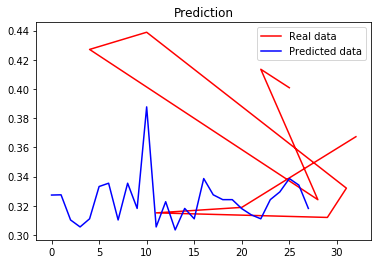

In [320]:
#y_pred = y_pred * (x2s-y1s) + y1s
#y_test = y_test * (x2s-y1s) + y1s
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [167]:
y_pred = model.predict(X_test1)
y_preds = pd.DataFrame(y_pred)
display(y_preds)
display(y_test1)

NameError: name 'model' is not defined

In [ ]:
for filename in sorted(glob.glob(path/*.png'), key=numericalSort): #assuming png
    cap = cv.imread(filename)